<a href="https://colab.research.google.com/github/one-last-time/FTFL/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST


> Here we will be using MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with
the digit it represents. This set has been studied so much that it is often called the “Hello World” of
Machine Learning: whenever people come up with a new classification algorithm, they are curious to see
how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle
MNIST.




In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.keys()

/usr/local/lib/python3.6/dist-packages/sklearn/datasets/_openml.py:55: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


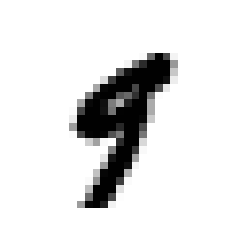

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
 y[36000]

'9'

We can create a test set and set it aside before inspecting the data closely. The
MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last
10,000 images):

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Let’s also shuffle the training set; this will guarantee that all cross-validation folds will be similar (you
don’t want one fold to be missing some digits). Moreover, some learning algorithms are sensitive to the
order of the training instances, and they perform poorly if they get many similar instances in a row.

In [ ]:
y_train[0]

'9'

In [ ]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train[0]

'2'

## Training a Binary Classifier
Let’s simplify the problem for now and only try to identify one digit — for example, the number 5. This
“5-detector” will be an example of a binary classifier, capable of distinguishing between just two
classes, 5 and not-5. Let’s create the target vectors for this classification task:

In [ ]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits.
y_test_5 = (y_test == '5')


In [ ]:
y_test_5[0:100]

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
from sklearn.linear_model import SGDClassifier  ## Stochastic Gradient Descent
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict([some_digit])

NameError: ignored

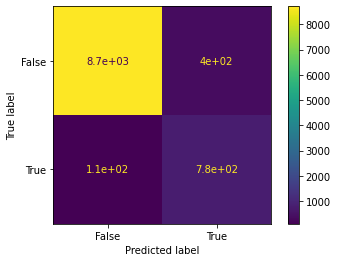

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(sgd_clf,X_test, y_test_5)
plt.show()

In [ ]:
y_pred = sgd_clf.predict(X_test)
from sklearn.metrics import classification_report, plot_roc_curve
print(classification_report(y_test_5,y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.97      9108
        True       0.66      0.88      0.76       892

    accuracy                           0.95     10000
   macro avg       0.82      0.92      0.86     10000
weighted avg       0.96      0.95      0.95     10000



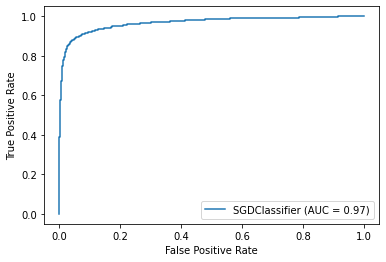

In [ ]:
plot_roc_curve(sgd_clf, X_test, y_test_5) 
plt.show()

## Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor. There are many performance measures available.

##  Cross-Validation
Occasionally we need more control over the cross-validation process than what Scikit-Learn provides off-the-shelf. In these cases,
you can implement cross-validation yourself; it is actually fairly straightforward. This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class. The following code does roughly the same thing as
Scikit-Learn’s cross_val_score() function, and prints the same result:

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = (y_train_5[train_index])
  X_test_fold = X_train[test_index]
  y_test_fold = (y_train_5[test_index])
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))
  

0.9674
0.95085
0.94055


The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio
of each class. At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes predictions on
the test fold. Then it counts the number of correct predictions and outputs the ratio of correct predictions.


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9671, 0.9543, 0.9642])

## Confusion Matrix
A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The
general idea is to count the number of times instances of class A are classified as class B. For example, to
know the number of times the classifier confused images of 5s with 3s, you would look in the 5
th
row and
3
rd column of the confusion matrix

![alt text](https://miro.medium.com/max/1780/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg)

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to
the actual targets. You could make predictions on the test set, but let’s keep it untouched for now

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation,
but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means
that you get a clean prediction for each instance in the training set

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53265,  1314],
       [  974,  4447]])

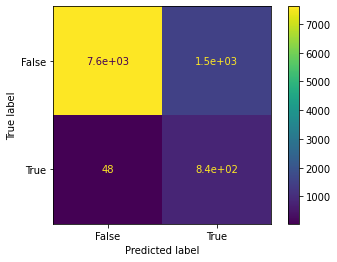

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(sgd_clf,X_test,y_test_5)

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. The first row of this matrix considers non-5 images (the negative class): 53,272 of them were
correctly classified as non-5s (they are called true negatives), while the remaining 1,307 were wrongly
classified as 5s (false positives). The second row considers the images of 5s (the positive class): 1,077
were wrongly classified as non-5s (false negatives), while the remaining 4,344 were correctly classified
as 5s (true positives). A perfect classifier would have only true positives and true negatives, so its
confusion matrix would have nonzero values only on its main diagonal

## Precision & Recall

![alt text](https://miro.medium.com/max/888/1*7J08ekAwupLBegeUI8muHA.png)

A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct
(precision = 1/1 = 100%). This would not be very useful since the classifier would ignore all but one
positive instance. So precision is typically used along with another metric named recall, also called
sensitivity or true positive rate (TPR):



In [ ]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.7719145981600417
0.8203283527024534


Now your 5-detector does not look as shiny as it did when you looked at its accuracy. When it claims an
image represents a 5, it is correct 91% of the time. Moreover, it only detects 63% of the 5s.

It is often convenient to combine precision and recall into a single metric called the F1 score, in
particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of
precision and recall. Whereas the regular mean treats all values equally, the harmonic
mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if
both recall and precision are high.
![alt text](https://i.ibb.co/vJpc82j/Screenshot-63.png)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.79538544088714

The F1 score favors classifiers that have similar precision and recall. This is not always what you want:
in some contexts you mostly care about precision, and in other contexts you really care about recall. 

For
example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a
classifier that rejects many good videos (low recall) but keeps only safe ones (high precision),  rather than
a classifier that has a much higher recall but lets a few really bad videos show up in your product (in such
cases, you may even want to add a human pipeline to check the classifier’s video selection)

 On the other
hand, suppose you train a classifier to detect shoplifters on surveillance images: it is probably fine if your
classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few
false alerts, but almost all shoplifters will get caught).

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is
called the precision/recall tradeoff.

## Precision/Recall Tradeoff


*   To understand this tradeoff, let’s look at how the SGDClassifier makes its classification decisions.
*   For
each instance, it computes a score based on a decision function, and if that score is greater than a
threshold, it assigns the instance to the positive class, or else it assigns it to the negative class. 


Suppose
the decision threshold is positioned at the central arrow (between the two 5s): you will find 4 true
positives (actual 5s) on the right of that threshold, and one false positive (actually a 6). Therefore, with
that threshold, the precision is 80% (4 out of 5). But out of 6 actual 5s, the classifier only detects 4, so the
recall is 67% (4 out of 6). Now if you raise the threshold (move it to the arrow on the right), the false
positive (the 6) becomes a true negative, thereby increasing precision (up to 100% in this case), but one
true positive becomes a false negative, decreasing recall down to 50%. Conversely, lowering the
threshold increases recall and reduces precision.
![alt text](https://i.ibb.co/M75L9bZ/Screenshot-64.png)







> Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores
that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its
decision_function() method, which returns a score for each instance, and then make predictions based
on those scores using any threshold you want:



In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred 



array([False])

In [ ]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])



> This confirms that raising the threshold decreases recall. The image actually represents a 5, and the
classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 200,000. So how can you decide which threshold to use? For this you will first need to get the scores of all
instances in the training set using the cross_val_predict() function again, but this time specifying that
you want it to return decision scores instead of predictions



In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

Now with these scores you can compute precision and recall for all possible thresholds using the
precision_recall_curve() function

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


In [ ]:
len(recalls)

59940

In [ ]:
len(precisions)

59940

In [ ]:
print(precisions, recalls, thresholds)

[0.09044195 0.09042677 0.09042828 ... 1.         1.         1.        ] [1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00] [-83206.94243224 -83155.66048121 -83083.62611851 ...  30872.66985172
  32156.61643076  39563.5287643 ]


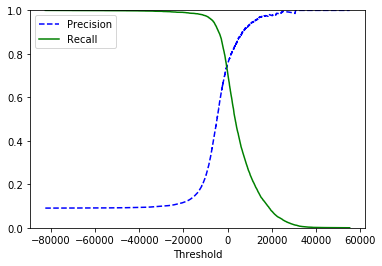

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


So let’s suppose you decide to aim for 90% precision. You look up the first plot (zooming in a bit) and
find that you need to use a threshold of about 70,000. To make predictions (on the training set for now),
instead of calling the classifier’s predict() method, you can just run this code:

In [ ]:
y_train_pred_90 = (y_scores > 70000)

## ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.
It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC
curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the
ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true
negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR
is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.


To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the
roc_curve() function:

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

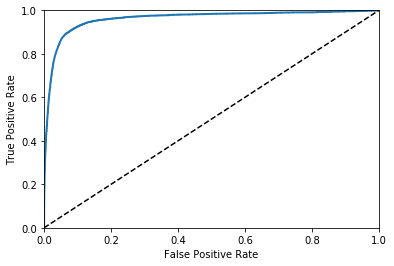

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()


## AUC
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

![alt text](https://developers.google.com/machine-learning/crash-course/images/AUC.svg)

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. 

AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.


AUC is desirable for the following two reasons:

AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)


0.9613726791252181

## F1-Score

In [ ]:
from sklearn.metrics import f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_true = [0, 1, 2, 0, 1, 2]
f1_score(y_true, y_pred, average='macro') ## Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
f1_score(y_true, y_pred, average='micro') ## Calculate metrics globally by counting the total true positives, false negatives and false positives.
f1_score(y_true, y_pred, average=None)
f1_score(y_true, y_pred, zero_division=1)

## Multiclass Classification

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called
multinomial classifiers) can distinguish between more than two classes.

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling
multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are
strictly binary classifiers. However, there are various strategies that you can use to perform multiclass
classification using multiple binary classifiers.

For example, one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is
to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then
when you want to classify an image, you get the decision score from each classifier for that image and you
select the class whose classifier outputs the highest score. This is called the one-versus-all (OvA)
strategy (also called one-versus-the-rest).


Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s,
another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one
(OvO) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST
problem, this means training 45 binary classifiers! When you want to classify an image, you have to run
the image through all 45 classifiers and see which class wins the most duels. The main advantage of OvO
is that each classifier only needs to be trained on the part of the training set for the two classes that it must
distinguish.




In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['9'], dtype='<U1')

In [ ]:
 np.argmax(some_digit_scores)
 sgd_clf.classes_
 sgd_clf.classes_[5]

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use the
OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance and pass a binary
classifier to its constructor. For example, this code creates a multiclass classifier using the OvO strategy,
based on a SGDClassifier:


In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])
len(ovo_clf.estimators_)

45

## Error Analysis


In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx


array([[5680,    0,   29,   15,    5,   44,   37,    2,   88,   23],
       [   1, 6358,   43,   13,   16,   30,    8,    6,  236,   31],
       [  70,   75, 4951,   97,   65,   65,   99,   52,  433,   51],
       [  29,   30,  136, 4932,   21,  391,   21,   32,  386,  153],
       [  20,   16,   23,   14, 4919,   36,   70,   10,  232,  502],
       [  78,   30,   26,  151,  100, 4408,   96,   17,  396,  119],
       [  35,   17,   67,    6,   53,  132, 5510,    3,   90,    5],
       [  35,   26,   49,   91,  140,   28,    5, 5011,  244,  636],
       [  34,   82,   43,   95,   45,  444,   33,    8, 4835,  232],
       [  26,   19,   18,   83,  275,   84,    2,   77,  358, 5007]])

## Multilabel Classification

Until now each instance has always been assigned to just one class. In some cases you may want your
classifier to output multiple classes for each instance. For example, consider a face-recognition
classifier: what should it do if it recognizes several people on the same picture? Of course it should
attach one label per person it recognizes. Say the classifier has been trained to recognize three faces,
Alice, Bob, and Charlie; then when it is shown a picture of Alice and Charlie, it should output [1, 0, 1]
(meaning “Alice yes, Bob no, Charlie yes”). Such a classification system that outputs multiple binary
labels is called a multilabel classification system.

In [ ]:
y_train_int = y_train.astype('int32')


array([7, 8, 1, 4, 1, 1, 7, 4, 0, 8, 7, 1, 0, 4, 2, 1, 0, 4, 9, 0, 3, 9,
       9, 0, 3, 6, 6, 3, 0, 1, 0, 4, 4, 7, 3, 2, 3, 0, 2, 3, 7, 6, 8, 9,
       6, 5, 5, 0, 4, 7, 2, 4, 5, 4, 5, 6, 2, 7, 9, 3, 2, 2, 1, 7, 4, 2,
       6, 0, 9, 6, 9, 1, 7, 8, 6, 2, 1, 3, 2, 7, 1, 1, 5, 4, 8, 9, 8, 3,
       8, 7, 7, 7, 9, 6, 9, 4, 0, 3, 9, 8], dtype=int32)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train_int >= 7 )
y_train_even = (y_train_int % 2 != 1)
y_multilabel = np.c_[y_train_large, y_train_even]


NameError: ignored

In [ ]:
!pip install scikit-multilearn


     |████████████████████████████████| 92kB 2.3MB/s 


In [ ]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.linear_model import LogisticRegression

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())
classifier.fit(X_train, y_multilabel)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LabelPowerset(classifier=LogisticRegression(C=1.0, class_weight=None,
                                            dual=False, fit_intercept=True,
                                            intercept_scaling=1, l1_ratio=None,
                                            max_iter=100, multi_class='auto',
                                            n_jobs=None, penalty='l2',
                                            random_state=None, solver='lbfgs',
                                            tol=0.0001, verbose=0,
                                            warm_start=False),
              require_dense=[True, True])

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
classifier.predict([some_digit])

<1x2 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in List of Lists format>

In [ ]:
knn_clf.predict([some_digit])

array([[False, False]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

This assumes that all labels are equally important, which may not be the case. In particular, if you have
many more pictures of Alice than of Bob or Charlie, you may want to give more weight to the classifier’s
score on pictures of Alice. One simple option is to give each label a weight equal to its support (i.e., the
number of instances with that target label). To do this, simply set average="weighted" in the preceding
code.

## Multioutput Classification

The last type of classification task we are going to discuss here is called multioutput-multiclass
classification (or simply multioutput classification). It is simply a generalization of multilabel
classification where each label can be multiclass (i.e., it can have more than two possible values).

To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit
image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just
like the MNIST images. Notice that the classifier’s output is multilabel (one label per pixel) and each
label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput
classification system.

The line between classification and regression is sometimes blurry, such as in this example. Arguably, predicting pixel intensity is
more akin to regression than to classification. Moreover, multioutput systems are not limited to classification tasks; you could even
have a system that outputs multiple labels per instance, including both class labels and value labels.

The line between classification and regression is sometimes blurry, such as in this example. Arguably, predicting pixel intensity is
more akin to regression than to classification. Moreover, multioutput systems are not limited to classification tasks; you could even
have a system that outputs multiple labels per instance, including both class labels and value labels.

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

NameError: ignored

![alt text](https://i.ibb.co/SrbKkwp/Screenshot-65.png)

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
